<a href="https://colab.research.google.com/github/shift-right/LAA-Project/blob/main/LAA_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running a LAA Solution


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists
 5G_code
'Animal_Sound Classification'
'「Arduino Programming_20190316.pptx」複本'
'B34064061_賴宥瑜(Yo-Yu,Lai)_Sound Classification.rar'
 BMS_charge
 BMS圖片
 code
'Colab Notebooks'
'DeepQ Network'
'DYL-Good-Time-Journal-Activity-Log-v21 - AEIOU.pdf'
 example
 handwrite
'Homework 2 worksheets v2.pdf'
 images
 Layout
'Linear Algebra and Its Applications 5th Edition.pdf'
 MIT18_03SCF11_ps5_s21s.pdf
'My Drive'
 Notability
 Photos
 QL
 sketchup
'SOLIDSWORKS 2015 安裝說明.pdf'
 Solution-Manual-for-Mechanics-of-Materials-8th-Edition-by-Gere.pdf
 UrbanSound8K
 yolov4
 yolov4.ipynb
 助教課
 單字
 實驗
 情緒與壓力管理.pdf
 數值方法
 自控實驗
 課程餘額監控程式2.0
 資結Bintree.c
 電影
 霍爾元件電路板.png


In [4]:
# cd back into the darknet folder to run detections
%cd /mydrive/code

/content/gdrive/My Drive/code


# Define Helper Functions

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [ ]:
# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Uploading Local or Google Drive Files to Use
You may want to run detections on more than just the images within the darknet/data/ folder. This step will show you how to upload local or Google Drive files to the cloud VM and run detections on them!

In [ ]:
# # try out the upload helper function! (I uploaded an image called highway.jpg, upload whatever you want!)
# %cd /mydrive/5G_code
# upload()

### Download Files to Local Machine or Google Drive from Cloud VM
You can also easily download images from your cloud VM to save to your local machine or Google Drive. 

#### Method 1: Local Machine

You can do it easily by using our helper function 'download()' or by right clicking the image in the File Explorer on the left side of your notebook and hitting **Download**. Files will be saved to your *Downloads* folder.

This is useful if you want to download the **'predictions.jpg'** images that the object detector outputs. 

#### Method 2: Google Drive
A simple copy command can copy over any file to your Google Drive as it is already mounted. (you must run the mount command above if you have not already)

```
!cp <file to download> <destination to save file>
```
See example of each below

In [ ]:
# # LOCAL MACHINE DOWNLOAD
# # if you get an error first run then run it again and it should work
# download('predictions.jpg')

In [ ]:
# # GOOGLE DRIVE DOWNLOAD
# # note that I can change what the image name is saved as (I am saving it as detection1.jpg)
# !cp predictions.jpg /mydrive/images/detection1.jpg

##import module

In [ ]:
from LAA_env import LAA
from DQN_Brain import DeepQNetwork
from DoubleDQN_Brain import DoubleDQN
from DuelingDQN_Brain import DuelingDQN
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
import time

Instructions for updating:
non-resource variables are not supported in the long term


#Training Function

In [ ]:
def run_LAA():
    
    count = 0
    step = 0
    reward_total_ql = 0
  
    for episode in range(100):
        # initial observation
        observation = env.reset()
        env.index = 0
        count +=1
        # if (episode >= 200) and (episode % 200 == 0):
        #     print("episode:",episode)

        print("episode start")
        env.last_reward = 0
        while True:
            # RL choose action based on observation
           
            action = RL.choose_action(observation)
            # print("action",action)

            # RL take action and get next observation and reward
            
            observation_, reward, done = env.step(action)

            reward /= 100
            reward = reward - env.last_reward
          
            if env.index == 0:
              reward = 0
            #print("reward",reward)

            RL.store_transition(observation, action, reward, observation_)
           

            if (step >= 10) and (step % 5 == 0):
                RL.learn()

            # swap observation
            observation = observation_

            env.last_reward = reward

            # break while loop when end of this episode
            if done:
                env.reward_his.append(reward)
                reward_total_ql +=  reward
                print("reward_total",reward_total_ql)
                print("episode end")
                break
            env.index +=1
            step += 1
        if RL.memory_counter >= 20000000:
            break
            
    return (reward_total_ql /count)

# Train

In [ ]:
### WIFIAP
if __name__ == "__main__":
    
    print("DQN")
    start =time.time()
    env = LAA()
    RL = DuelingDQN(15, 300, memory_size=2000,e_greedy_increment=0.00001, sess=None, dueling=True, output_graph=True)
    #RL = DoubleDQN(15, 300, memory_size=2000,e_greedy_increment=0.00001, double_q=True, sess=None, output_graph=True)
    #RL = DeepQNetwork(15, 300,memory_size=2000,output_graph=True)

 #1
    for i in range(1000):
        
        ### 調整參數
        env.SBSs = 5
        env.WIFIAPs= 1
        env.SBSUEs = 20
        env.Bands = 15
        
        if RL.memory_counter >= 20000000:
            break

        for j in range(1):
            
            env.WIFIAPs= 1
            number_of_WIFIAP = []
            ql_total_reward_list = []

            for i in range(5):
            
                # if i >0 :
                #     if env.WIFIAPs == 1:
                #         env.WIFIAPs = i * 5
                #     else:
                #         env.WIFIAPs += 5
            #     number_of_WIFIAP.append(env.WIFIAPs)
            #     print("WIFIAPs:",env.WIFIAPs)

                env.setup_env()

                average = run_LAA()
                ql_total_reward_list.append(average)
            
            print(ql_total_reward_list)
            
            env.SBSs += 5
            
        end = time.time()
        print("執行時間:",end-start)
    

In [ ]:
tf.reset_default_graph()

#Testing Function

In [ ]:
def run_LAA():

    count = 0
    step = 0
    reward_total_ql_0 = 0
    reward_total_ql_1 = 0
    reward_total_ql_2 = 0
    reward_total_random = 0
    reward_total_op = 0
    for episode in range(100):
      
        # initial observation
        observation = env.reset()
        env.index = 0
        count +=1
        
        observation_0 = observation
        observation_1 = observation
        observation_2 = observation

        #DQN
        RL_0 = DeepQNetwork(15, 300,memory_size=2000,output_graph=True)
        print("DQN")
        while True:

            # RL choose action based on observation
            action = RL_0.choose_action(observation_0)
            #print("action",action)
            
            observation_, reward, done = env.step(action)

            observation_0 = observation_
            print("reward:",reward)
            print("\n")
            # break while loop when end of this episode
            if done:
                #env.reward_his.append(reward)
                reward_total_ql_0 +=  reward
                # print("reward",reward)
                break
            env.index +=1
            step += 1
        
        env.index = 0
        
        tf.reset_default_graph()
        for num in range(env.SBSs*env.SBSUEs):
          env.SBSUE_LOC[num][2] = -1
        

        #DoubleQN
        RL_1 = DoubleDQN(15, 300, memory_size=2000,e_greedy_increment=0.00001, double_q=True, sess=None, output_graph=True)
        print("DoubleDQN")
        while True:
            # RL choose action based on observation

            action = RL_1.choose_action(observation_1)
            #print("action",action)
            
            observation_, reward, done = env.step(action)

            observation_1 = observation_
            print("reward:",reward)
            print("\n")
            # break while loop when end of this episode
            if done:
                #env.reward_his.append(reward)
                reward_total_ql_1 +=  reward
                # print("reward",reward)
                # print("episode end")
                break
            env.index +=1

        env.index = 0
        tf.reset_default_graph()
        for num in range(env.SBSs*env.SBSUEs):
          env.SBSUE_LOC[num][2] = -1

        #DuelingDQN
        RL_2 = DuelingDQN(15, 300, memory_size=1000,e_greedy_increment=0.00001, sess=None, dueling=True, output_graph=True)
        print("DuelingDQN")
        while True:

            # RL choose action based on observation
            action = RL_2.choose_action(observation_2)
            #print("action",action)
            
            observation_, reward, done = env.step(action)

            observation_2 = observation_
            print("reward:",reward)
            print("\n")
            # break while loop when end of this episode
            if done:
                #env.reward_his.append(reward)
                reward_total_ql_2 +=  reward
                # print("reward",reward)
                # print("episode end")
                break
            env.index +=1
            tf.reset_default_graph()
            

        for index in range(env.SBSs*env.SBSUEs):
            if env.choose_list[index]==-1:
                env.choose_action_OP(index)
        
        reward_op = env.get_throughtput_OP()
        #print("reward_op:",reward_op)
        reward_total_op +=  reward_op
        reward_total_op += env.get_throughtput_OP()
        reward_total_random += env.get_throughtput_Random()

    return ((reward_total_ql_0 /count),(reward_total_ql_1 / count),(reward_total_ql_2 / count),(reward_total_op / count),(reward_total_random / count))
    

#Test

串流輸出內容已截斷至最後 5000 行。
reward: 620.4883997796179


action: 14
reward: 610.1382228044548


action: 8
reward: 598.1732582952674


action: 11
reward: 586.3857597342623


action: 2
reward: 577.283832256704


action: 14
reward: 569.9784297578074


action: 9
reward: 560.5306863874576


action: 9
reward: 548.1976594361761


action: 1
reward: 536.6788046612684


action: 10
reward: 525.3356939873582


action: 9
reward: 512.239186994131


action: 9
reward: 496.3309004397909


action: 10
reward: 484.813822199391


action: 2
reward: 470.1702287270414


action: 4
reward: 458.4558583083182


action: 2
reward: 446.0552017994646


action: 14
reward: 433.4875170722873


action: 1
reward: 423.6456556795576


action: 1
reward: 411.889017190903


action: 7
reward: 403.8251198761637


action: 5
reward: 393.076915111489


action: 5
reward: 382.5906974671796


action: 1
reward: 369.0019194693902


action: 5
reward: 358.76534808721766


action: 11
reward: 348.6967210662881


action: 10
reward: 340.9682848325667

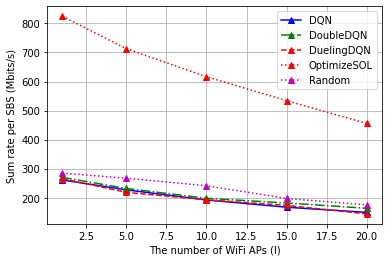

執行時間: 275.58546447753906


In [ ]:
### WIFIAP
if __name__ == "__main__":
    
    start =time.time()
    env = LAA()
   
    

 #1
    for i in range(1):
        
        ### 調整參數
        env.SBSs = 5
        env.WIFIAPs= 1
        env.SBSUEs = 20
        env.Bands = 15
        
        if (i >= 1000) and (i % 1000 == 0):
            print("episode:",i)

        for j in range(1):
            
            env.WIFIAPs= 1
            number_of_WIFIAP = []
            ql_0_total_reward_list = []
            ql_1_total_reward_list = []
            ql_2_total_reward_list = []
            random_total_reward_list = []
            op_total_reward_list = []
            print("SBSs:",env.SBSs)

            for i in range(5):
            
                if i >0 :
                    if env.WIFIAPs == 1:
                        env.WIFIAPs = i * 5
                    else:
                        env.WIFIAPs += 5
                number_of_WIFIAP.append(env.WIFIAPs)
                print("WIFIAPs:",env.WIFIAPs)

                env.setup_env()

                reward_ql_0,reward_ql_1,reward_ql_2,reward_op,reward_random = run_LAA()
            
                ql_0_total_reward_list.append(reward_ql_0)
                ql_1_total_reward_list.append(reward_ql_1)
                ql_2_total_reward_list.append(reward_ql_2)
              

                random_total_reward_list.append(reward_random)
                op_total_reward_list.append(reward_op)
                # RL.plot_cost()
                #env.plot_reward()
                #print(random_total_reward_list)
                #tf.reset_default_graph()
            
            if j==0:
                number_of_WIFIAP_0 = number_of_WIFIAP
                random_total_reward_list_0 = random_total_reward_list
                op_total_reward_list_0 = op_total_reward_list
                ql_0_total_reward_list_0 = ql_0_total_reward_list
                ql_1_total_reward_list_0 = ql_1_total_reward_list
                ql_2_total_reward_list_0 = ql_2_total_reward_list
                
        #     if j==1:
        #         number_of_WIFIAP_1 = number_of_WIFIAP
        #         random_total_reward_list_1 = random_total_reward_list
        #         op_total_reward_list_1 = op_total_reward_list
            
        #     if j==2:
        #         number_of_WIFIAP_2 = number_of_WIFIAP
        #         random_total_reward_list_2 = random_total_reward_list
        #         op_total_reward_list_2 = op_total_reward_list

        #     if j==3:
        #         number_of_WIFIAP_3 = number_of_WIFIAP
        #         random_total_reward_list_3 = random_total_reward_list
        #         op_total_reward_list_3 = op_total_reward_list
                
            
            env.SBSs += 5
            
        # random_line0, = plt.plot(number_of_WIFIAP_0, random_total_reward_list_0,label='Random.SBSs=5',color='b',marker='^',linestyle=':')
        # random_line1, = plt.plot(number_of_WIFIAP_1, random_total_reward_list_1,label='Random.SBSs=10',color='g',marker='v',linestyle=':')
        # random_line2, = plt.plot(number_of_WIFIAP_2, random_total_reward_list_2,label='Random.SBSs=15',color='r',marker='s',linestyle=':')
        # random_line3, = plt.plot(number_of_WIFIAP_3, random_total_reward_list_3,label='Random.SBSs=20',color='c',marker='o',linestyle=':')
        # op_line0, = plt.plot(number_of_WIFIAP_0, op_total_reward_list_0,label='Optimize.SBSs=5',color='b',marker='^',linestyle='-.')
        # op_line1, = plt.plot(number_of_WIFIAP_1, op_total_reward_list_1,label='Optimize.SBSs=10',color='g',marker='v',linestyle='-.')
        # op_line2, = plt.plot(number_of_WIFIAP_2, op_total_reward_list_2,label='Optimize.SBSs=15',color='r',marker='s',linestyle='-.')
        # op_line3, = plt.plot(number_of_WIFIAP_3, op_total_reward_list_3,label='Optimize.SBSs=20',color='c',marker='o',linestyle='-.')

        ql_0_line0, = plt.plot(number_of_WIFIAP_0, ql_0_total_reward_list_0,label='DQN',color='b',marker='^',linestyle='-')
        ql_1_line0, = plt.plot(number_of_WIFIAP_0, ql_1_total_reward_list_0,label='DoubleDQN',color='g',marker='^',linestyle='-.')
        ql_2_line0, = plt.plot(number_of_WIFIAP_0, ql_2_total_reward_list_0,label='DuelingDQN',color='r',marker='^',linestyle='--')
        random_line0, = plt.plot(number_of_WIFIAP_0, random_total_reward_list_0,label='Random',color='m',marker='^',linestyle=':')
        op_line0, = plt.plot(number_of_WIFIAP_0, op_total_reward_list_0,label='OptimizeSOL',color='r',marker='^',linestyle=':')
        plt.legend(handles = [ql_0_line0, ql_1_line0,ql_2_line0,op_line0,random_line0,],loc='best')
        
        # plt.legend(handles = [random_line0, random_line1, random_line2, random_line3, op_line0, op_line1, op_line2, op_line3], loc='best')
        plt.ylabel('Sum rate per SBS (Mbits/s)')
        plt.xlabel('The number of WiFi APs (I)')
        plt.grid()
        plt.savefig('./WiFi.svg')
        plt.savefig('./WiFi.png')
        plt.show()
       
        end = time.time()
        print("執行時間:",end-start)


In [ ]:
tf.reset_default_graph()

串流輸出內容已截斷至最後 5000 行。
reward: 646.2596138877432


action: 14
reward: 636.6603908149355


action: 11
reward: 625.0463737313162


action: 6
reward: 609.1172072610585


action: 3
reward: 606.1554976748037


action: 5
reward: 597.1537965540103


action: 1
reward: 586.58683477981


action: 5
reward: 572.3242423180063


action: 11
reward: 560.3059073426368


action: 8
reward: 552.9906440269524


action: 10
reward: 545.176848017769


action: 11
reward: 532.4416099816547


action: 9
reward: 523.2344773434337


action: 14
reward: 512.7768491042323


action: 10
reward: 498.9324791234768


action: 6
reward: 484.9001788336598


action: 13
reward: 481.4447148878242


action: 2
reward: 468.4112555803971


action: 1
reward: 457.8101830315465


action: 7
reward: 448.3549336358357


action: 9
reward: 437.6590361670216


action: 7
reward: 424.8576935856454


action: 8
reward: 412.9943977927977


action: 1
reward: 399.4236607871977


action: 0
reward: 385.0062754912297


action: 11
reward: 374.85646893755

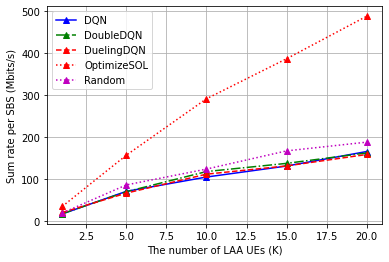

執行時間: 243.10577607154846


In [ ]:


### SBSUE
if __name__ == "__main__":

    start =time.time()
    env = LAA()
    
    #1

    ### 調整參數
    env.SBSs = 5
    env.WIFIAPs= 20
    env.SBSUEs = 1
    env.Bands = 15
    
    

    for j in range(1):
        
        env.SBSUEs= 1
        number_of_SBSUE = []
        ql_0_total_reward_list = []
        ql_1_total_reward_list = []
        ql_2_total_reward_list = []
        op_total_reward_list = []
        random_total_reward_list = []
        print("SBSs:",env.SBSs)

        for i in range(5):

            if i >0 :
                if env.SBSUEs == 1:
                    env.SBSUEs = i * 5
                else:
                    env.SBSUEs += 5
            number_of_SBSUE.append(env.SBSUEs)
            print("SBSUEs:",env.SBSUEs)

            env.setup_env()

            reward_ql_0,reward_ql_1,reward_ql_2,reward_op,reward_random = run_LAA()
            
            ql_0_total_reward_list.append(reward_ql_0)
            ql_1_total_reward_list.append(reward_ql_1)
            ql_2_total_reward_list.append(reward_ql_2)
            
            op_total_reward_list.append(reward_op)
            random_total_reward_list.append(reward_random)
        
        if j==0:
            number_of_SBSUE_0 = number_of_SBSUE
            random_total_reward_list_0 = random_total_reward_list
            op_total_reward_list_0 = op_total_reward_list
            ql_0_total_reward_list_0 = ql_0_total_reward_list
            ql_1_total_reward_list_0 = ql_1_total_reward_list
            ql_2_total_reward_list_0 = ql_2_total_reward_list
        
        env.SBSs += 5
    
    ql_0_line0, = plt.plot(number_of_SBSUE_0, ql_0_total_reward_list_0,label='DQN',color='b',marker='^',linestyle='-')
    ql_1_line0, = plt.plot(number_of_SBSUE_0, ql_1_total_reward_list_0,label='DoubleDQN',color='g',marker='^',linestyle='-.')
    ql_2_line0, = plt.plot(number_of_SBSUE_0, ql_2_total_reward_list_0,label='DuelingDQN',color='r',marker='^',linestyle='--')
    random_line0, = plt.plot(number_of_WIFIAP_0, random_total_reward_list_0,label='Random',color='m',marker='^',linestyle=':')
    op_line0, = plt.plot(number_of_SBSUE_0, op_total_reward_list_0,label='OptimizeSOL',color='r',marker='^',linestyle=':')
    plt.legend(handles = [ql_0_line0, ql_1_line0,ql_2_line0,op_line0,random_line0],loc='best')
        
    plt.ylabel('Sum rate per SBS (Mbits/s)')
    plt.xlabel('The number of LAA UEs (K)')
    plt.grid()
    plt.savefig('./LAA.svg')
    plt.savefig('./LAA.png')
    plt.show()

    end = time.time()
    print("執行時間:",end-start)

